<a href="https://colab.research.google.com/github/HelloSwiat/AGH_Analiza_Danych/blob/main/Praca_zaliczeniowa_Analiza_Danych_w_Biznesie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Inicjowanie bibliotek


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Pakiet do otwierania plików o innych formatach --> https://github.com/Roche/pyreadstat
!pip install pyreadstat
import pyreadstat

In [93]:
# Instalacja dysku googla- gdzie przechowywany jest plik z danymi (wersja dla Colab'a)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2 Wczytanie oryginalnych baz danych

In [94]:
# ścieżka do plików z danymi

# ludność
file_path_L = '/content/drive/My Drive/Colab Notebooks/bkl21d.sav'

# pracodawcy
# file_path_P = '/content/drive/My Drive/Colab Notebooks/bkl21f.sav'

In [95]:
# Wczytanie pliku z danymi nt. ludności
df_L, meta = pyreadstat.read_sav(file_path_L)

# Wczytanie pliku z danymi nt. pracodawców
# df_P, meta = pyreadstat.read_sav(file_path_P)

In [98]:
# Wyświetlenie kilka pierwszych wierszy
print(df_L.head())

       id       intid  waga_proba  waga_proba_kor      waga_pop  waga_pop_kor  \
0  6590.0  03540-2021    0.374529        0.379380   3732.470588   3780.814881   
1  6591.0  02070-2021    0.865094        0.876299   8621.333333   8732.999924   
2  6592.0  01987-2021    0.283841        0.287518   2828.700000   2865.338333   
3  6593.0  01686-2021    1.380901        1.398787  13761.750000  13939.997104   
4  6594.0  04358-2021    0.897526        0.909151   8944.545455   9060.398404   

   rodzaj  edycja     rok     datawyw  ...  pform4t  neet  neet2  form12m  \
0     1.0  2021.0  2021.0  2021-09-20  ...      0.0   0.0    0.0      0.0   
1     1.0  2021.0  2021.0  2021-09-20  ...      1.0   0.0    0.0      1.0   
2     1.0  2021.0  2021.0  2021-09-20  ...      0.0   0.0    0.0      0.0   
3     1.0  2021.0  2021.0  2021-09-20  ...      1.0   0.0    0.0      0.0   
4     1.0  2021.0  2021.0  2021-09-20  ...      1.0   0.0    0.0      0.0   

   pform12m1  pform12m2  pform12m  nform12m  doksz

In [99]:
# prompt: show me row number 0 in vertical column. Nie skracaj kolumny przez 3 kropki- pokaż całość

print(df_L.iloc[[0]].to_string(index=False))


    id      intid  waga_proba  waga_proba_kor    waga_pop  waga_pop_kor  rodzaj  edycja    rok    datawyw  powiat  woj  region  miejsce  miejsce_4k  powiat_operat  woj_operat  region_operat  miejsce_operat     m1  wiek  wiek_10k  wiek_6k  wiek_4k  wiek_3k  m2 prace praceteraz  BAEL_bezro  BAEL_praca  BAEL_aktyw  BAEL_sytzaw  BAEL_sytzaw2  bezrej  wykszt  wykszt_7k  wykszt_4k  wykszt_3k  matura  wyzsze  najwyzsze  uczy  uczy_gdzie  p1  p1_typ  p1_nrol  p1_rol  p2_pkd1  p2_pkd2  p2_pkd3  p2_pkd4  p2_pkd5  p2_1  p2_pkd_21k  p2_pkd_6k  p2_pkd_4k  p3_isco  p3_isco_d  p3_1  p3_2     p4   p5  p6  p6_1  p6_1x  p7_1  p7_2  p7_3  p7_4  p8  p9  p9_1  p9_1x  hp9_1_1  p9_2  p9_2x  hp9_2_1  p10a_00  p10a_01  p10a_02  p10a_03  p10a_04  p10a_05  p10a_06  p10a_07  p10a_08  p10a_09  p10a_10  p10a_11  p10a_12  p10a_13  p10a_14  p10a_15  p10a_15i  p10a_naj  p10b_00  p10b_01  p10b_02  p10b_03  p10b_04  p10b_05  p10b_06  p10b_07  p10b_08  p10b_09  p10b_10  p10b_11  p10b_12  p10b_13  p10b_14  p10b_15  p10b_1

In [100]:
headers = list(df_L.columns)
print(headers)

['id', 'intid', 'waga_proba', 'waga_proba_kor', 'waga_pop', 'waga_pop_kor', 'rodzaj', 'edycja', 'rok', 'datawyw', 'powiat', 'woj', 'region', 'miejsce', 'miejsce_4k', 'powiat_operat', 'woj_operat', 'region_operat', 'miejsce_operat', 'm1', 'wiek', 'wiek_10k', 'wiek_6k', 'wiek_4k', 'wiek_3k', 'm2', 'prace', 'praceteraz', 'BAEL_bezro', 'BAEL_praca', 'BAEL_aktyw', 'BAEL_sytzaw', 'BAEL_sytzaw2', 'bezrej', 'wykszt', 'wykszt_7k', 'wykszt_4k', 'wykszt_3k', 'matura', 'wyzsze', 'najwyzsze', 'uczy', 'uczy_gdzie', 'p1', 'p1_typ', 'p1_nrol', 'p1_rol', 'p2_pkd1', 'p2_pkd2', 'p2_pkd3', 'p2_pkd4', 'p2_pkd5', 'p2_1', 'p2_pkd_21k', 'p2_pkd_6k', 'p2_pkd_4k', 'p3_isco', 'p3_isco_d', 'p3_1', 'p3_2', 'p4', 'p5', 'p6', 'p6_1', 'p6_1x', 'p7_1', 'p7_2', 'p7_3', 'p7_4', 'p8', 'p9', 'p9_1', 'p9_1x', 'hp9_1_1', 'p9_2', 'p9_2x', 'hp9_2_1', 'p10a_00', 'p10a_01', 'p10a_02', 'p10a_03', 'p10a_04', 'p10a_05', 'p10a_06', 'p10a_07', 'p10a_08', 'p10a_09', 'p10a_10', 'p10a_11', 'p10a_12', 'p10a_13', 'p10a_14', 'p10a_15', 'p

# 3 Duplikacja i "ważenie" bazy danych

## Duplikowanie bazy

In [168]:
# prompt: create a copy of df_L
df_L1 = df_L.copy()

## "Ważenie" zmiennych

In [ ]:
#TBD

# 4 Zapoznanie się z danymi

## Podgląd przykładowych zmiennych

Jak zobaczyć wartości które przyjmuje dana zmienna i jak są kodowane?

In [ ]:
# kilka pierwszych lub ostatnich wartości danej zmiennej można obejrzeć w ten sposób:

# df_L1['edycja'].head(10)

### Metryczka

In [134]:
# prompt: show variable_value_labels for variable "region"

for key, value in meta.variable_value_labels['region'].items():
    print(f"{key}: {value}")


1.0: Centralny (łódz/śwkrz)
2.0: Północno-Zachodni (lubus/wlkp/zachpom)
3.0: Północny (kuj-pom/pom/warm-maz)
4.0: Południowo-Zachodni (dlnśl/opol)
5.0: Południowy (małop/śl)
6.0: Woj. mazowieckie
7.0: Wschodni (lubel/podkarp/podl)


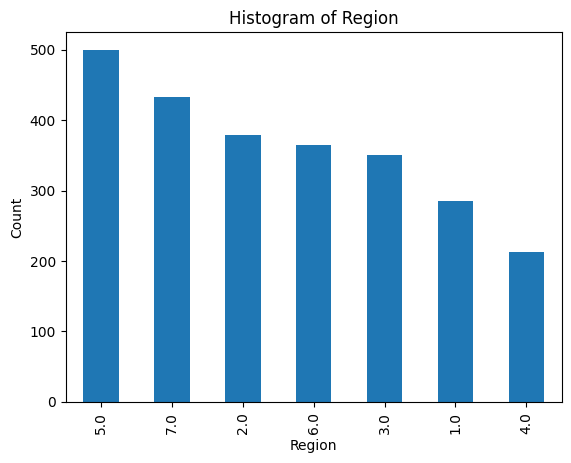

In [135]:
# prompt: draw histogram with variable "region" from df_1

# https://stat.gov.pl/statystyka-regionalna/jednostki-terytorialne/klasyfikacja-nuts/klasyfikacja-nuts-w-polsce/
# https://stat.gov.pl/download/gfx/portalinformacyjny/pl/defaultstronaopisowa/5872/1/1/klasyfikacja-nuts-w-polsce-2003-2021.xls

df_L1['region'].value_counts().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Histogram of Region')
plt.show()


In [136]:
for key, value in meta.variable_value_labels['wiek_10k'].items():
    print(f"{key}: {value}")

1.0: 18-24
2.0: 25-29
3.0: 30-34
4.0: 35-39
5.0: 40-44
6.0: 45-49
7.0: 50-54
8.0: 55-59
9.0: 60-64
10.0: 65-69


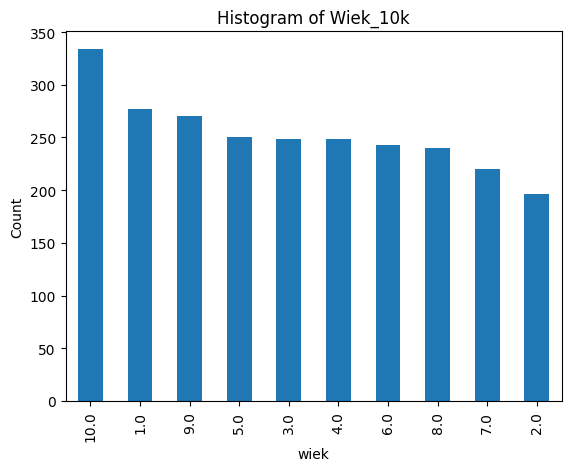

{1.0: '18-24', 2.0: '25-29', 3.0: '30-34', 4.0: '35-39', 5.0: '40-44', 6.0: '45-49', 7.0: '50-54', 8.0: '55-59', 9.0: '60-64', 10.0: '65-69'}


In [ ]:
# Histogram dla wieku respondetów
df_1['wiek_10k'].value_counts().plot(kind='bar')
plt.xlabel('wiek')
plt.ylabel('Count')
plt.title('Histogram of Wiek_10k')
plt.show()
print(meta.variable_value_labels['wiek_10k'])

{-8.0: 'trudno powiedzieć', -7.0: 'odmowa odpowiedzi', -3.0: 'brak danych', -1.0: 'NDT', 1.0: 'niski', 2.0: 'podstawowy', 3.0: 'średni', 4.0: 'wysoki', 5.0: 'bardzo wysoki'}


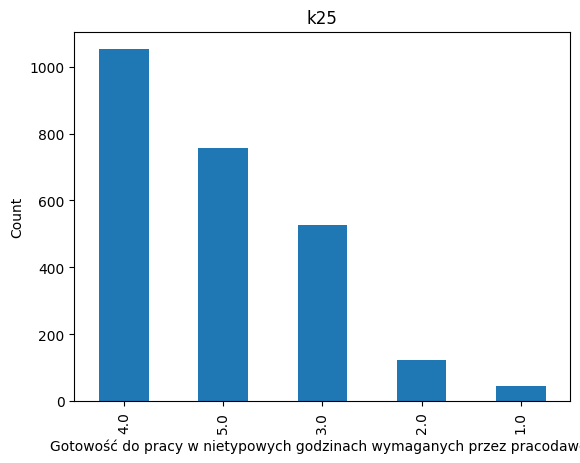

In [132]:
print(meta.variable_value_labels['k25'])
df['k23'].value_counts().plot(kind='bar')
plt.xlabel('Gotowość do pracy w nietypowych godzinach wymaganych przez pracodawcę')
plt.ylabel('Count')
plt.title('k25')
plt.show()

In [105]:
for key, value in meta.variable_value_labels['m2'].items():
    print(f"{key}: {value}")

0.0: mężczyzna
1.0: kobieta


In [106]:
for key, value in meta.variable_value_labels['edycja'].items():
    print(f"{key}: {value}")

2017.0: BKL 2017
2019.0: BKL 2019
2021.0: BKL 2021 (realizowany 2021-2022)


In [107]:
for key, value in meta.variable_value_labels['miejsce'].items():
    print(f"{key}: {value}")

1.0: wieś (teren niezurbanizowany)
2.0: miasto do 9 999
3.0: miasto 10 000 - 19 999
4.0: miasto 20 000 - 49 999
5.0: miasto 50 000 - 99 999
6.0: miasto 100 000 - 199 999
7.0: miasto 200 000 - 499 999
8.0: miasto 500 000 +
9.0: Warszawa


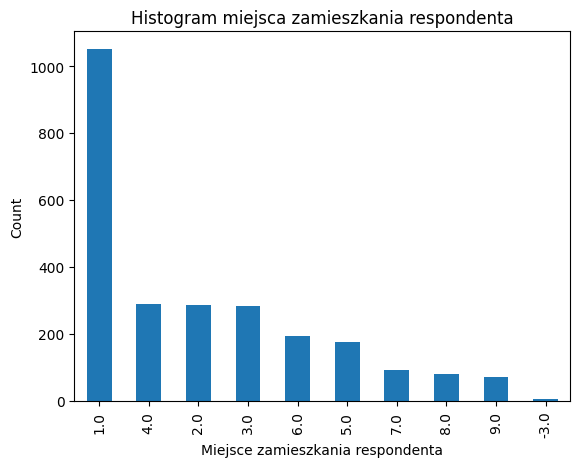

{1.0: 'wieś (teren niezurbanizowany)', 2.0: 'miasto do 9 999', 3.0: 'miasto 10 000 - 19 999', 4.0: 'miasto 20 000 - 49 999', 5.0: 'miasto 50 000 - 99 999', 6.0: 'miasto 100 000 - 199 999', 7.0: 'miasto 200 000 - 499 999', 8.0: 'miasto 500 000 +', 9.0: 'Warszawa'}


In [ ]:
df_1['miejsce'].value_counts().plot(kind='bar')
plt.xlabel('Miejsce zamieszkania respondenta')
plt.ylabel('Count')
plt.title('Histogram miejsca zamieszkania respondenta')
plt.show()
print(meta.variable_value_labels['miejsce'])

In [111]:
for key, value in meta.variable_value_labels['wykszt_7k'].items():
    print(f"{key}: {value}")

1.0: gimnazjalne i poniżej
2.0: zasadnicze zawodowe
3.0: średnie ogólnokształcące
4.0: średnie zawodowe (liceum, technikum)
5.0: średnie (szkoła polic, inna nie wyższa)
6.0: wyższe (licencjat/inż.)
7.0: wyższe (mgr)


In [112]:
for key, value in meta.variable_value_labels['wykszt_4k'].items():
    print(f"{key}: {value}")

1.0: gimnazjalne i poniżej
2.0: zasadnicze zawodowe
3.0: średnie
4.0: wyższe


### Soft skills

-8.0: trudno powiedzieć
-7.0: odmowa odpowiedzi
-3.0: brak danych
-1.0: NDT
1.0: niski
2.0: podstawowy
3.0: średni
4.0: wysoki
5.0: bardzo wysoki


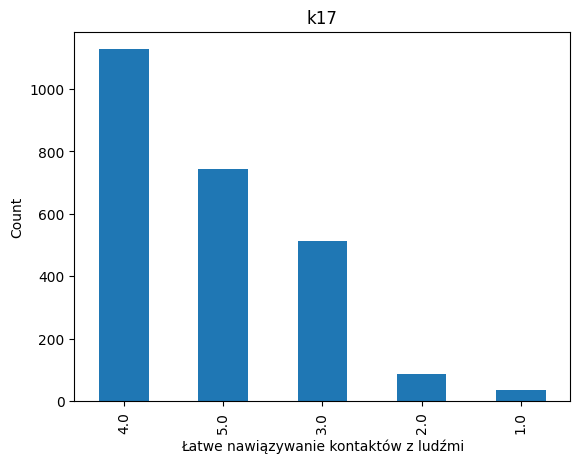

In [156]:
for key, value in meta.variable_value_labels['k17'].items():
    print(f"{key}: {value}")

df_L1['k17'].value_counts().plot(kind='bar')
plt.xlabel('Łatwe nawiązywanie kontaktów z ludźmi')
plt.ylabel('Count')
plt.title('k17')
plt.show()

In [115]:
for key, value in meta.variable_value_labels['k23'].items():
    print(f"{key}: {value}")

-8.0: trudno powiedzieć
-7.0: odmowa odpowiedzi
-3.0: brak danych
-1.0: NDT
1.0: niski
2.0: podstawowy
3.0: średni
4.0: wysoki
5.0: bardzo wysoki


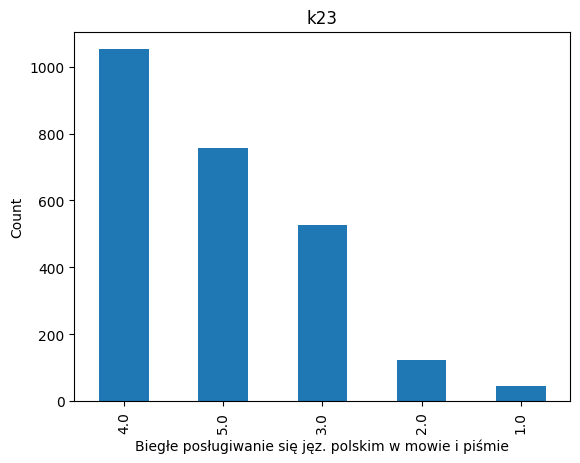

In [158]:
df_L1['k23'].value_counts().plot(kind='bar')
plt.xlabel('Biegłe posługiwanie się jęz. polskim w mowie i piśmie')
plt.ylabel('Count')
plt.title('k23')
plt.show()

In [122]:
for key, value in meta.variable_value_labels['k25'].items():
    print(f"{key}: {value}")

-8.0: trudno powiedzieć
-7.0: odmowa odpowiedzi
-3.0: brak danych
-1.0: NDT
1.0: niski
2.0: podstawowy
3.0: średni
4.0: wysoki
5.0: bardzo wysoki


### Elastyczność i inne

In [140]:
# prompt: how to filter df_1 to see only the lines with p3_isco2 value equal to 71

# Pokaż dane tylko tych osób, które w zmiennej p3_isco2 mają wartość 71 (własna działalnośc + budowlanka)

df_filtered = df_1[df_1['p3_isco2'] == 71]
df_filtered


,id,intid,waga_proba,waga_proba_kor,waga_pop,waga_pop_kor,rodzaj,edycja,rok,datawyw,...,neet,neet2,form12m,pform12m1,pform12m2,pform12m,nform12m,dokszt_all,dokszt_all_bo,new_variable
67,6657.0,02328-2021,1.100105,1.114354,10963.400000,11105.401875,1.0,2021.0,2021.0,2021-09-23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1975.0
92,6682.0,05667-2021,1.300558,1.317403,12961.071429,13128.947858,1.0,2021.0,2021.0,2021-09-24,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1989.0
237,6827.0,02624-2021,1.223727,1.239577,12195.388889,12353.347924,2.0,2021.0,2021.0,2021-09-29,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1987.0
337,6927.0,07269-2021,1.029456,1.042790,10259.333333,10392.215885,2.0,2021.0,2021.0,2021-10-01,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1992.0
735,7325.0,04744-2021,1.199452,1.214988,11953.473684,12108.299347,2.0,2021.0,2021.0,2021-10-18,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1995.0
989,7579.0,07209-2021,0.759399,0.769235,7568.000000,7666.023441,3.0,2021.0,2021.0,2021-11-05,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1995.0
1020,7610.0,07400-2021,1.029456,1.042790,10259.333333,10392.215885,2.0,2021.0,2021.0,2021-11-07,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1986.0
1098,7688.0,07187-2021,0.661603,0.670172,6593.388889,6678.788818,2.0,2021.0,2021.0,2021-11-13,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1984.0
1380,7970.0,01201-2021,1.363249,1.380906,13585.833333,13761.801902,3.0,2021.0,2021.0,2021-11-25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1986.0
1562,8152.0,07966-2021,1.050817,1.064428,10472.210526,10607.850340,2.0,2021.0,2021.0,2021-12-28,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1994.0


### Zawody

### 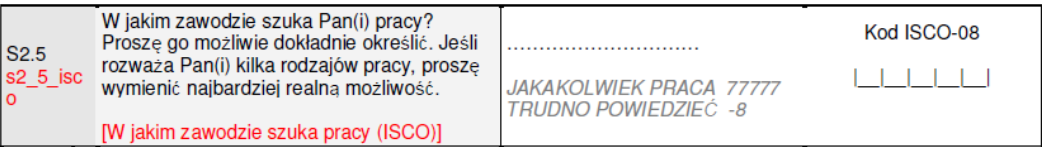

In [169]:
# lista zawodów wg. 6-cio cyfrowej skali isco
for key, value in meta.variable_value_labels['wykszt_4k'].items():
    print(f"{key}: {value}")

-8.0: trudno powiedzieć
-7.0: odmowa odpowiedzi
-3.0: brak danych
-1.0: NDT
0.0: siły zbrojne
1.0: kierownicy
2.0: specjaliści
3.0: technicy i inny średni personel
4.0: pracownicy biurowi
5.0: pracownicy usług i sprzedawcy
6.0: rolnicy, ogrodnicy, leśnicy i rybacy
7.0: robotnicy przemysłowi i rzemieślnicy
8.0: operatorzy i monterzy maszyn i urządzeń
9.0: pracownicy wykonujący prace proste
11.0: przedstawiciele władz publicznych, wyżsi urzędnicy i dyrektorzy generalni
12.0: kierownicy do spraw zarządzania i handlu
13.0: kierownicy do spraw produkcji i usług
14.0: kierownicy w branży hotelarskiej, handlu i innych branżach usługowych
21.0: specjaliści nauk fizycznych, matematycznych i technicznych
22.0: specjaliści do spraw zdrowia
23.0: specjaliści nauczania i wychowania
24.0: specjaliści do spraw ekonomicznych i zarządzania
25.0: specjaliści do spraw technologii informacyjno-komunikacyjnych
26.0: specjaliści z dziedziny prawa, dziedzin społecznych i kultury
31.0: średni personel nauk fi

In [ ]:
# lista zawodów wg. 5 cyfrowej skali isco
for key, value in meta.variable_value_labels['wykszt_4k'].items():
    print(f"{key}: {value}")

-8.0: trudno powiedzieć
-7.0: odmowa odpowiedzi
-3.0: brak danych
-1.0: NDT
0.0: siły zbrojne
1.0: kierownicy
2.0: specjaliści
3.0: technicy i inny średni personel
4.0: pracownicy biurowi
5.0: pracownicy usług i sprzedawcy
6.0: rolnicy, ogrodnicy, leśnicy i rybacy
7.0: robotnicy przemysłowi i rzemieślnicy
8.0: operatorzy i monterzy maszyn i urządzeń
9.0: pracownicy wykonujący prace proste
11.0: przedstawiciele władz publicznych, wyżsi urzędnicy i dyrektorzy generalni
12.0: kierownicy do spraw zarządzania i handlu
13.0: kierownicy do spraw produkcji i usług
14.0: kierownicy w branży hotelarskiej, handlu i innych branżach usługowych
21.0: specjaliści nauk fizycznych, matematycznych i technicznych
22.0: specjaliści do spraw zdrowia
23.0: specjaliści nauczania i wychowania
24.0: specjaliści do spraw ekonomicznych i zarządzania
25.0: specjaliści do spraw technologii informacyjno-komunikacyjnych
26.0: specjaliści z dziedziny prawa, dziedzin społecznych i kultury
31.0: średni personel nauk fi

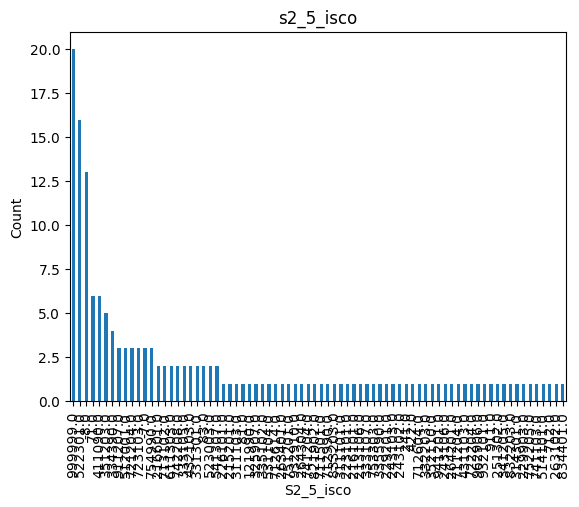

In [170]:
# lista zawodów wg. 6 cyfrowej skali isco
for key, value in meta.variable_value_labels['s2_5_isco'].items():
    print(f"{key}: {value}")

df_L1['s2_5_isco'].value_counts().plot(kind='bar')
plt.xlabel('S2_5_isco')
plt.ylabel('Count')
plt.title('s2_5_isco')
plt.show()

In [154]:
# lista zawodów wg. 5 cyfrowej skali isco
for key, value in meta.variable_value_labels['wykszt_4k'].items():
    print(f"{key}: {value}")

1.0: gimnazjalne i poniżej
2.0: zasadnicze zawodowe
3.0: średnie
4.0: wyższe


In [171]:
for key, value in meta.variable_value_labels['p3_isco2'].items():
    print(f"{key}: {value}")

-8.0: trudno powiedzieć
-7.0: odmowa odpowiedzi
-3.0: brak danych
-1.0: NDT
0.0: siły zbrojne
1.0: kierownicy
2.0: specjaliści
3.0: technicy i inny średni personel
4.0: pracownicy biurowi
5.0: pracownicy usług i sprzedawcy
6.0: rolnicy, ogrodnicy, leśnicy i rybacy
7.0: robotnicy przemysłowi i rzemieślnicy
8.0: operatorzy i monterzy maszyn i urządzeń
9.0: pracownicy wykonujący prace proste
11.0: przedstawiciele władz publicznych, wyżsi urzędnicy i dyrektorzy generalni
12.0: kierownicy do spraw zarządzania i handlu
13.0: kierownicy do spraw produkcji i usług
14.0: kierownicy w branży hotelarskiej, handlu i innych branżach usługowych
21.0: specjaliści nauk fizycznych, matematycznych i technicznych
22.0: specjaliści do spraw zdrowia
23.0: specjaliści nauczania i wychowania
24.0: specjaliści do spraw ekonomicznych i zarządzania
25.0: specjaliści do spraw technologii informacyjno-komunikacyjnych
26.0: specjaliści z dziedziny prawa, dziedzin społecznych i kultury
31.0: średni personel nauk fi

In [172]:
for key, value in meta.variable_value_labels['p3_isco4'].items():
    print(f"{key}: {value}")

-8.0: trudno powiedzieć
-7.0: odmowa odpowiedzi
-3.0: brak danych
-1.0: NDT
0.0: siły zbrojne
1.0: kierownicy
2.0: specjaliści
3.0: technicy i inny średni personel
4.0: pracownicy biurowi
5.0: pracownicy usług i sprzedawcy
6.0: rolnicy, ogrodnicy, leśnicy i rybacy
7.0: robotnicy przemysłowi i rzemieślnicy
8.0: operatorzy i monterzy maszyn i urządzeń
9.0: pracownicy wykonujący prace proste
11.0: przedstawiciele władz publicznych, wyżsi urzędnicy i dyrektorzy generalni
12.0: kierownicy do spraw zarządzania i handlu
13.0: kierownicy do spraw produkcji i usług
14.0: kierownicy w branży hotelarskiej, handlu i innych branżach usługowych
21.0: specjaliści nauk fizycznych, matematycznych i technicznych
22.0: specjaliści do spraw zdrowia
23.0: specjaliści nauczania i wychowania
24.0: specjaliści do spraw ekonomicznych i zarządzania
25.0: specjaliści do spraw technologii informacyjno-komunikacyjnych
26.0: specjaliści z dziedziny prawa, dziedzin społecznych i kultury
31.0: średni personel nauk fi

### Wykształcenie

### Sytuacja zawodowa- gotowość do podjęcia pracy (?)

In [157]:
# Sytuacja zawodowa (BAEL)
for key, value in meta.variable_value_labels['BAEL_sytzaw'].items():
    print(f"{key}: {value}")

0.0: pracujący
1.0: bezrobotni
2.0: nieaktywni


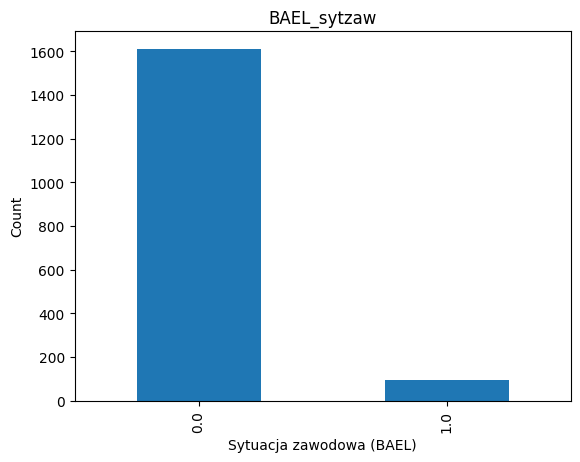

In [159]:
df_L1['BAEL_sytzaw'].value_counts().plot(kind='bar')
plt.xlabel('Sytuacja zawodowa (BAEL)')
plt.ylabel('Count')
plt.title('BAEL_sytzaw')
plt.show()

In [175]:
for key, value in meta.variable_value_labels['z4_2'].items():
    print(f"{key}: {value}")

-8.0: trudno powiedzieć
-7.0: odmowa odpowiedzi
-3.0: brak danych
-1.0: NDT
0.0: nie
1.0: tak, lekki
2.0: tak, umiarkowany
3.0: tak, znaczny


## Zmienne wykorzystane w analizie



In [108]:
list_of_used_var = ["id", "region", "m1","wiek","wiek_10k","m2"]
for list_of_used_var in list_of_used_var:
  print(list_of_used_var)

id
region
m1
wiek
wiek_10k
m2


# Czyszczenie danych

## Braki danych

## Wartości odstające

# Tworzenie zmiennych syntetycznych

## Filtrujemy osoby z doświadczeniem w branży budowlanej

Dostępność relatywnie dużej liczby osób z doświadczeniem w budowlance:

Jeżeli p3_isco2 = 71 (własna działalnośc + budowlanka) lub q3_isco2=71 (przeszłościowo robili w budowlance) lub e10_isco2=71 lub f5_isco2=71 (mieli kiedyś umowę o pracę w budowlance) lub u5_isco2=71 == wszystkie osoby które kiedyś lub teraz pracują w budowlane (na różnych formach zatrudnienia);

In [166]:
# prompt: Pokaż dane tylko tych osób które mają p3_isco2 wartość = 71 lub q3_isco2=71 lub e10_isco=71 lub f5_isco2=71 lub u5_isco=71

# Filter the DataFrame
df_budowlancy_praktycy = df_1[
    (df_L1['p3_isco2'] == 71) |
    (df_L1['q3_isco2'] == 71) |
    (df_L1['e10_isco'] == 71) |
    (df_L1['f5_isco2'] == 71) |
    (df_L1['u5_isco'] == 71)
]

# Display the filtered data
df_budowlancy_praktycy


,id,intid,waga_proba,waga_proba_kor,waga_pop,waga_pop_kor,rodzaj,edycja,rok,datawyw,...,neet2,form12m,pform12m1,pform12m2,pform12m,nform12m,dokszt_all,dokszt_all_bo,new_variable,bud_exp
25,6615.0,06408-2021,1.197024,1.212528,11929.277778,12083.790047,1.0,2021.0,2021.0,2021-09-21,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2001.0,1
67,6657.0,02328-2021,1.100105,1.114354,10963.400000,11105.401875,1.0,2021.0,2021.0,2021-09-23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1975.0,1
92,6682.0,05667-2021,1.300558,1.317403,12961.071429,13128.947858,1.0,2021.0,2021.0,2021-09-24,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1989.0,1
125,6715.0,05500-2021,1.068557,1.082397,10649.000000,10786.929654,2.0,2021.0,2021.0,2021-09-25,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1964.0,1
149,6739.0,04101-2021,1.302435,1.319305,12979.782609,13147.901392,2.0,2021.0,2021.0,2021-09-26,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1962.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2439,9029.0,07389-2022,1.104457,1.118763,11006.777778,11149.341497,2.0,2021.0,2022.0,2022-04-03,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1962.0,1
2465,9055.0,02333-2022,0.566143,0.573476,5642.058824,5715.136786,3.0,2021.0,2022.0,2022-04-05,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1955.0,1
2473,9063.0,02126-2022,1.104457,1.118763,11006.777778,11149.341497,3.0,2021.0,2022.0,2022-04-05,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1965.0,1
2491,9081.0,07003-2022,1.803672,1.827034,17975.000000,18207.818624,2.0,2021.0,2022.0,2022-04-07,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1995.0,1


In [165]:
# Dodanie nowej zmiennej 'bud_exp' do df_L1
# df_L1['bud_exp'] = 0  # Inicjalizacja zmiennej zerami

# Ustawienie wartości na 1 dla osób spełniających warunek
# df_L1.loc[(df_L1['p3_isco2'] == 71) | (df_L1['q3_isco2'] == 71) | (df_L1['e10_isco2'] == 71) | (df_L1['f5_isco2'] == 71) | (df_L1['u5_isco2'] == 71), 'bud_exp'] = 1

## Filtrujemy osoby z wykształceniem w branży budowlanej

## Dostępność relatywnie dużej liczby osób z wykształceniem budowlanym:

od7112 do 7131 lub detaliczny podział: 711103 do 713102- malarz budowlany); i 2 cyfrowy: 71

w3Z_4_isco (zasadnicza szkoła zawodowa)

Wszystkie 3 zakresy łączymy razem;

w3T_4_isco (technikum)
Studia- sprawa jest zamotana- więc trzeba w uproszczone sortowanie zrobić;
Koncentrujemy się na tych co kończyli studia: ISCED- kody kierunków;
Poziom 3- najbardziej detaliczny

Etykiety poszukać- są w bazie zaszyte

In [167]:
# Dodanie nowej zmiennej 'bud_edu' do df_L1
df_L1['bud_edu'] = 0  # Inicjalizacja zmiennej zerami

# Ustawienie wartości na 1 dla osób spełniających warunek
df_1.loc[(df_L1['p3_isco2'] == 71) | (df_L1['q3_isco2'] == 71) | (df_L1['e10_isco2'] == 71) | (df_L1['f5_isco2'] == 71) | (df_L1['u5_isco2'] == 71), 'bud_exp'] = 1

## Filtrujemy osoby starsze niż 30 lat

### {Założenie biznesowe} ponieważ od tego wieku nasi klienci postrzegą doradcę jako "dojrzały", tj. godny zaufania;

0    1962.0
1    2002.0
2    1984.0
3    1996.0
4    1997.0
5    1993.0
6    1964.0
7    1998.0
8    1972.0
9    1999.0
Name: m1, dtype: float64


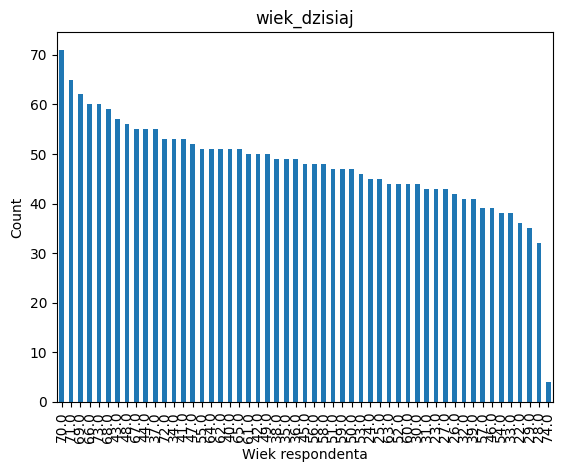

In [ ]:
print(df_1['m1'].head(10))
df_1['wiek_dzisiaj'] = 2025 - df_1['m1']
df_1['wiek_dzisiaj'].value_counts().plot(kind='bar')
plt.xlabel('Wiek respondenta')
plt.ylabel('Count')
plt.title('wiek_dzisiaj')
plt.show()

# Wstępna wizualizacja danych

Do wizualizacji użyjemy pakietu ggplot2 https://github.com/rstudio/cheatsheets/blob/main/data-visualization.pdf

# Nowa sekcja